# An example using MNIST Fashion


NOMS:
- LADIBE Samuel
- TEGUE Elisée

## Start Coding

Let's start with our import of TensorFlow

In [12]:
import tensorflow as tf

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [13]:
fash_mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [14]:
(training_images, training_labels), (test_images, test_labels) = fash_mnist.load_data()

In [15]:
training_images.shape

(60000, 28, 28)

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

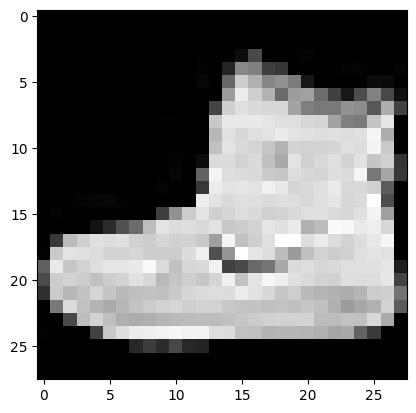

In [16]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

print(training_labels[0])
print(training_images[0])

plt.imshow(training_images[0], cmap='gray')

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [17]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [19]:
model.compile(optimizer = tf.optimizers.SGD(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7497 - accuracy: 0.7583
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5163 - accuracy: 0.8254
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4701 - accuracy: 0.8376
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4452 - accuracy: 0.8463
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4278 - accuracy: 0.8521


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate. It will report back the loss and the accuracy. Let's give it a try:

In [20]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4620 - accuracy: 0.8384


[0.46196240186691284, 0.8384000062942505]

#### Model summary

To have a summary of the model architecture, you can use "model.summary()"

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# common code
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images  = training_images / 255.0
test_images = test_images / 255.0

# To do 

- "Play" with the model: Try different values/configurations of the hyper-parameters and keep track of the obtained results.
- Introduce the validation set: 15 % of the training dataset: by adding parameter 'validation_split=0.15'to the function 'model.fit'

### Report the obtained performance here:

##### 10 epochs => 

- Train accuracy = 0.8683
- Validation acc = 0.8646
- Test acc = 0.8529

##### 15 epochs => 
- Train accuracy = 0.8780
- Validation acc = 0.8672
- Test acc = 0.8577

Those results suggest that : 
- Training the model for both 10 and 15 epochs results in high accuracies across the training, validation, and test sets, indicating that the model has low bias.
- The small increase in the difference between training and validation/test accuracies from 10 to 15 epochs may suggest a slight increase in variance. However, this increase does not necessarily indicate overfitting since the test accuracy also improves.
- The model demonstrates good generalization capabilities, as evidenced by the consistent increase in test accuracy.
While training for more epochs requires more computation, the improved performance on the test set could justify the additional computational cost.

Epoch 1/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.7759 - accuracy: 0.7505 - val_loss: 0.5726 - val_accuracy: 0.8049
Epoch 2/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5289 - accuracy: 0.8206 - val_loss: 0.5066 - val_accuracy: 0.8226
Epoch 3/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4802 - accuracy: 0.8345 - val_loss: 0.4813 - val_accuracy: 0.8304
Epoch 4/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4529 - accuracy: 0.8441 - val_loss: 0.4538 - val_accuracy: 0.8424
Epoch 5/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4351 - accuracy: 0.8491 - val_loss: 0.4497 - val_accuracy: 0.8474
Epoch 6/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4209 - accuracy: 0.8556 - val_loss: 0.4304 - val_accuracy: 0.8546
Epoch 7/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4087 - accuracy: 0.8586 - val_loss: 0.4161 - val_accuracy:

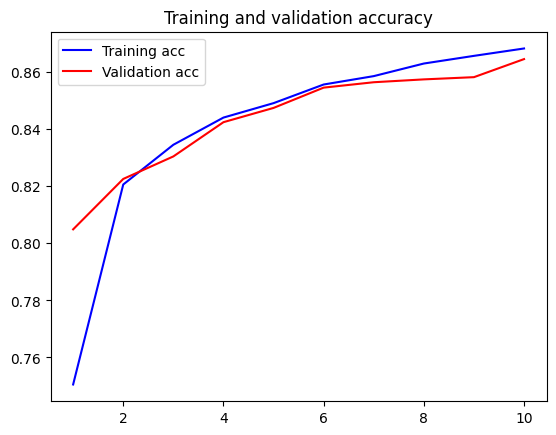

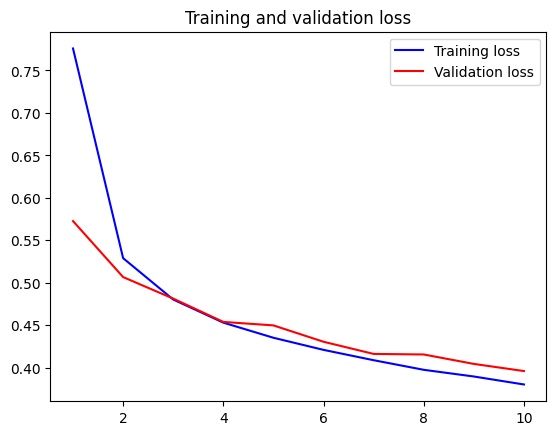

In [30]:
# Exp 1 (10 epochs)

# Here, we work with a two-layer NN.
# Learning is performaed using SGD, with a learning rate of 0.01 and momentum = 0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0.0),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=10)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4160 - accuracy: 0.8529


[0.416035532951355, 0.8529000282287598]

Epoch 1/15
1594/1594 [==============================] - 4s 2ms/step - loss: 0.7743 - accuracy: 0.7520 - val_loss: 0.5712 - val_accuracy: 0.8062
Epoch 2/15
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5282 - accuracy: 0.8219 - val_loss: 0.5045 - val_accuracy: 0.8213
Epoch 3/15
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4811 - accuracy: 0.8355 - val_loss: 0.4974 - val_accuracy: 0.8254
Epoch 4/15
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4541 - accuracy: 0.8436 - val_loss: 0.4608 - val_accuracy: 0.8349
Epoch 5/15
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4355 - accuracy: 0.8495 - val_loss: 0.4409 - val_accuracy: 0.8447
Epoch 6/15
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4217 - accuracy: 0.8537 - val_loss: 0.4430 - val_accuracy: 0.8427
Epoch 7/15
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4094 - accuracy: 0.8589 - val_loss: 0.4200 - val_accuracy:

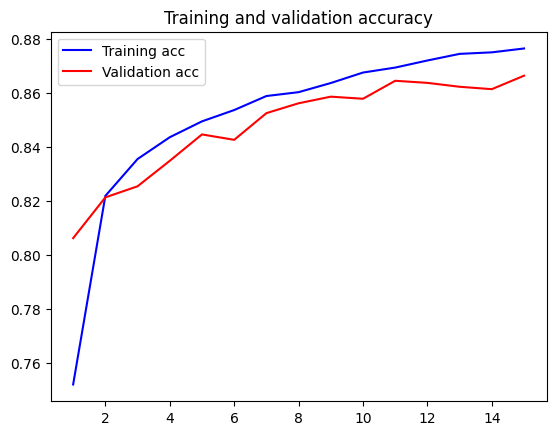

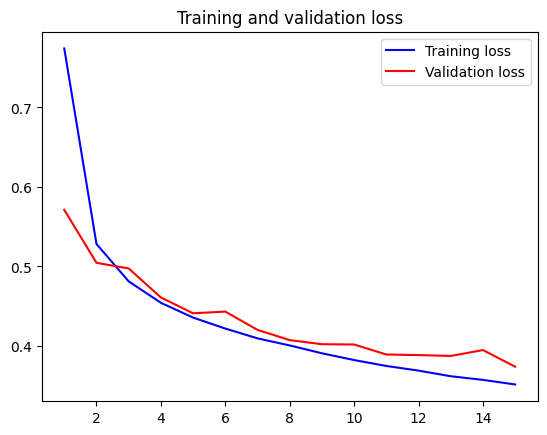

In [28]:
# Exp 1 (15 epochs)

# Here, we work with a two-layer NN.
# Learning is performaed using SGD, with a learning rate of 0.01 and momentum = 0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0.0),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [29]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4030 - accuracy: 0.8577


[0.4029766619205475, 0.857699990272522]

# To do 

- Change the optimizer from 'SGD' to 'adam' in the function 'model.compile(...)'...

### Report the obtained performance here:

##### 15 epochs => 
- Train accuracy = 0.9217
- Validation acc = 0.8866
- Test acc = 0.8809

##### What do you think of the variance?
These differences suggest that while the model performs very well on training data, it performs slightly worse on unseen data. Which indicates that the model has a relatively low variance. In other words, the model generate fairly well on new data, although there may be a room for improvement. 
...

Epoch 1/15
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5067 - accuracy: 0.8249 - val_loss: 0.4437 - val_accuracy: 0.8348
Epoch 2/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3848 - accuracy: 0.8624 - val_loss: 0.4135 - val_accuracy: 0.8533
Epoch 3/15
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3465 - accuracy: 0.8727 - val_loss: 0.3621 - val_accuracy: 0.8713
Epoch 4/15
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3197 - accuracy: 0.8838 - val_loss: 0.3440 - val_accuracy: 0.8791
Epoch 5/15
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3021 - accuracy: 0.8876 - val_loss: 0.3430 - val_accuracy: 0.8753
Epoch 6/15
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2860 - accuracy: 0.8934 - val_loss: 0.3270 - val_accuracy: 0.8832
Epoch 7/15
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.8994 - val_loss: 0.3428 - val_accuracy:

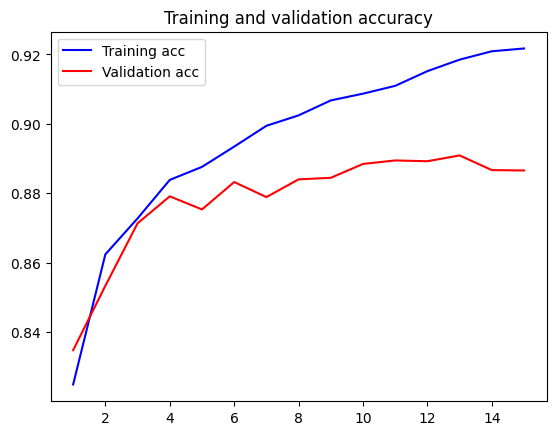

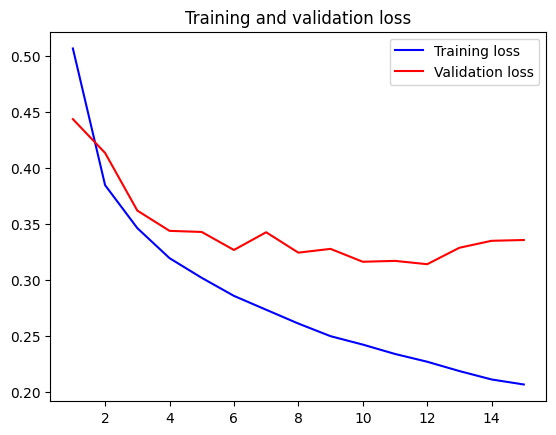

In [32]:
# Exp 2

# Change the optimizer from 'SGD' to 'adam' in the function 'model.compile(...)'...

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
)
model.compile(optimizer = adam,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8809


[0.36738625168800354, 0.8809000253677368]

# To do 

- In the previous experiment, we can notice a high variance.
- Use dropout to fix the problem. You can add layer "tf.keras.layers.Dropout(0.2)" before the hidden layer.

### Report the obtained performance here:

##### 15 epochs => 

- Train accuracy = 0.8979
- Validation acc = 0.8893
- Test acc = 0.8824

##### Does the dropout fix the problem?
- Traning accuracy: the training accuracy has decreased from 0.9217 to 0.8979 which is expected as dropout prevents the network from relying too heavily on any individual neuron, thus reducing overfitting to the training set.
- Validation/Test accuracy: both the validation and test accuracies have slightly improved. This improvement indicates that the model generalize more on new and unseen data.
Therefore yes, dropout appears to have helped in adressing the problem of high variance in this case. 

Epoch 1/15
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5516 - accuracy: 0.8045 - val_loss: 0.4179 - val_accuracy: 0.8534
Epoch 2/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4208 - accuracy: 0.8471 - val_loss: 0.3955 - val_accuracy: 0.8458
Epoch 3/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3796 - accuracy: 0.8609 - val_loss: 0.3671 - val_accuracy: 0.8712
Epoch 4/15
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3559 - accuracy: 0.8699 - val_loss: 0.3519 - val_accuracy: 0.8768
Epoch 5/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3403 - accuracy: 0.8733 - val_loss: 0.3671 - val_accuracy: 0.8670
Epoch 6/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3278 - accuracy: 0.8779 - val_loss: 0.3359 - val_accuracy: 0.8790
Epoch 7/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3191 - accuracy: 0.8799 - val_loss: 0.3218 - val_accuracy:

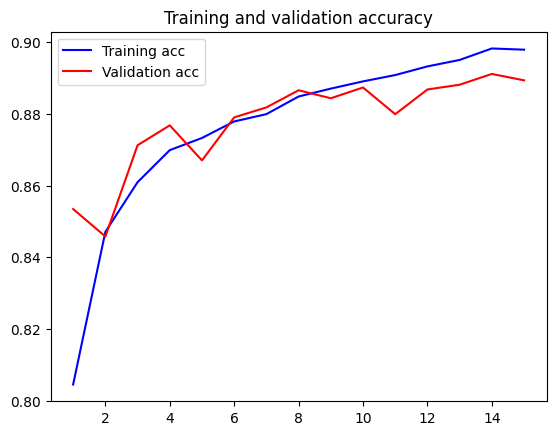

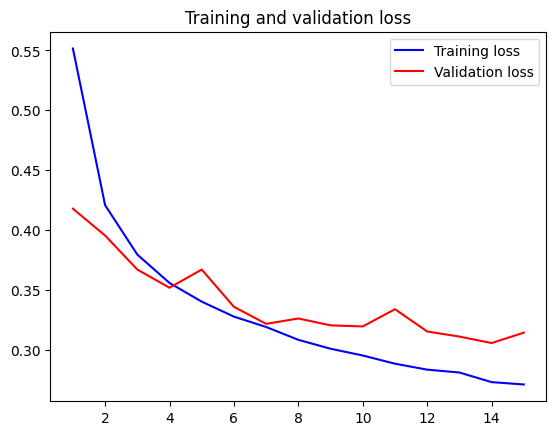

In [38]:
# Exp 3

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [39]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8824


[0.3344475328922272, 0.8823999762535095]

# To do 

- In the previous experiment, we have fixed the overfitting problem using dropout. Let's try to improve the accuracy of the model.
- Increase the number of neurons in the hidden layer => 512, 1024

### Report the obtained performance here:

##### 15 epochs for "512 hidden neurons"=> 
- Train accuracy = 0.90
- Validation acc = 0.89
- Test acc = 0.8832

##### 15 epochs for "1024 hidden neurons"=> 
- Train accuracy = 0.90
- Validation acc = 0.89
- Test acc = 0.8840

##### Is it satisfying?
The increase in the number of hidden neurons from 512 to 1024 does not seem to have a significant impact on the training or validation accuracy as both remain the same (0.90 and 0.89 respectively). There is a marginal improvement in test accuracy (an increase from 0.8832 to 0.8840), which is a very slight improvement.
...

Epoch 1/15
1594/1594 [==============================] - 9s 5ms/step - loss: 0.5244 - accuracy: 0.8117 - val_loss: 0.3988 - val_accuracy: 0.8537
Epoch 2/15
1594/1594 [==============================] - 14s 9ms/step - loss: 0.4019 - accuracy: 0.8527 - val_loss: 0.3686 - val_accuracy: 0.8679
Epoch 3/15
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3692 - accuracy: 0.8636 - val_loss: 0.3581 - val_accuracy: 0.8684
Epoch 4/15
1594/1594 [==============================] - 7s 5ms/step - loss: 0.3419 - accuracy: 0.8726 - val_loss: 0.3370 - val_accuracy: 0.8793
Epoch 5/15
1594/1594 [==============================] - 7s 4ms/step - loss: 0.3270 - accuracy: 0.8762 - val_loss: 0.3460 - val_accuracy: 0.8707
Epoch 6/15
1594/1594 [==============================] - 7s 4ms/step - loss: 0.3120 - accuracy: 0.8826 - val_loss: 0.3428 - val_accuracy: 0.8773
Epoch 7/15
1594/1594 [==============================] - 7s 4ms/step - loss: 0.3033 - accuracy: 0.8854 - val_loss: 0.3415 - val_accuracy

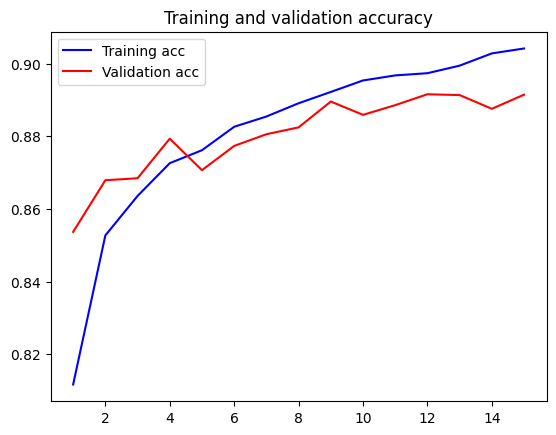

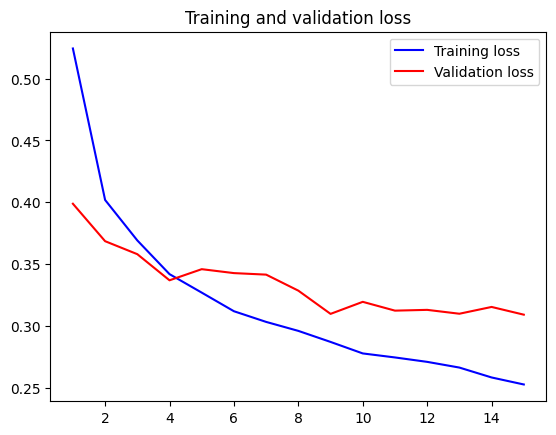

In [36]:
# Exp 4 (512 hidden neurons)

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [37]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3274 - accuracy: 0.8832


[0.32744649052619934, 0.8831999897956848]

Epoch 1/15
1594/1594 [==============================] - 16s 9ms/step - loss: 0.5135 - accuracy: 0.8156 - val_loss: 0.3888 - val_accuracy: 0.8583
Epoch 2/15
1594/1594 [==============================] - 15s 9ms/step - loss: 0.4023 - accuracy: 0.8518 - val_loss: 0.3613 - val_accuracy: 0.8696
Epoch 3/15
1594/1594 [==============================] - 14s 9ms/step - loss: 0.3619 - accuracy: 0.8665 - val_loss: 0.3407 - val_accuracy: 0.8776
Epoch 4/15
1594/1594 [==============================] - 15s 9ms/step - loss: 0.3427 - accuracy: 0.8719 - val_loss: 0.3455 - val_accuracy: 0.8712
Epoch 5/15
1594/1594 [==============================] - 15s 9ms/step - loss: 0.3215 - accuracy: 0.8796 - val_loss: 0.3524 - val_accuracy: 0.8743
Epoch 6/15
1594/1594 [==============================] - 14s 9ms/step - loss: 0.3108 - accuracy: 0.8837 - val_loss: 0.3286 - val_accuracy: 0.8791
Epoch 7/15
1594/1594 [==============================] - 15s 9ms/step - loss: 0.2970 - accuracy: 0.8885 - val_loss: 0.3325 - val_ac

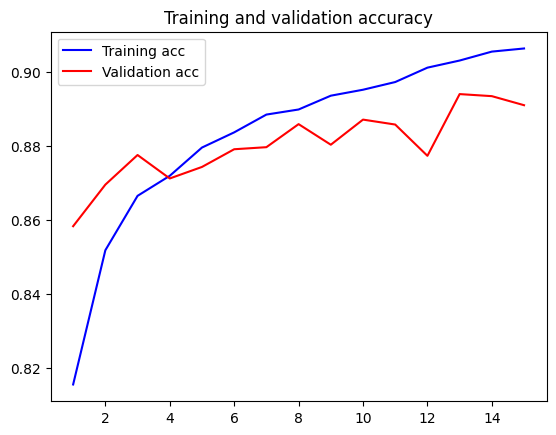

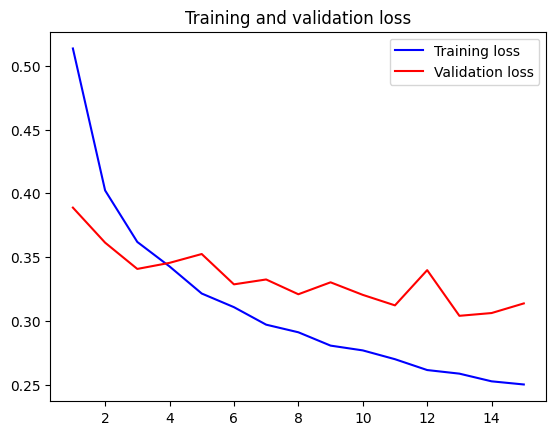

In [40]:
# Exp 4 (512 hidden neurons)

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 15 epochs => 
# Train accuracy = 0.90
# Validation acc = 0.89
# Test acc = 0.89

In [41]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3397 - accuracy: 0.8840


[0.33973896503448486, 0.8840000033378601]

# To do 

- Let's try to improve the performance by adding another hidden layer.
- So, we wil use two hidden layers (512, 128). For each layer, use dropout with a rate of 0.2.

### Report the obtained performance here:

##### 15 epochs => 
- Train accuracy = 0.8899  
- Validation acc = 0.8934
- Test acc = 0.8860

##### Is it satisfying?
The accuracy across the train, validation, and test sets is quite consistent, which suggests that the model is generalizing well. There's a slight drop from the validation to the test accuracy, but it's relatively small, indicating that the model isn't suffering from high variance (overfitting). Also, the introduction of dropout appears to have contributed positively to the generalization, as indicated by the close accuracy values.
However, compared to when the model is only made up of one hidden layer (whether 512 or 128), the model appears to be slightly worse.
...

Epoch 1/15
1594/1594 [==============================] - 15s 9ms/step - loss: 0.5406 - accuracy: 0.8027 - val_loss: 0.4342 - val_accuracy: 0.8353
Epoch 2/15
1594/1594 [==============================] - 9s 6ms/step - loss: 0.4277 - accuracy: 0.8414 - val_loss: 0.4008 - val_accuracy: 0.8502
Epoch 3/15
1594/1594 [==============================] - 10s 6ms/step - loss: 0.3925 - accuracy: 0.8546 - val_loss: 0.3699 - val_accuracy: 0.8639
Epoch 4/15
1594/1594 [==============================] - 9s 6ms/step - loss: 0.3748 - accuracy: 0.8627 - val_loss: 0.3654 - val_accuracy: 0.8669
Epoch 5/15
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3571 - accuracy: 0.8667 - val_loss: 0.3430 - val_accuracy: 0.8746
Epoch 6/15
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3462 - accuracy: 0.8697 - val_loss: 0.3292 - val_accuracy: 0.8840
Epoch 7/15
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3357 - accuracy: 0.8744 - val_loss: 0.3410 - val_accurac

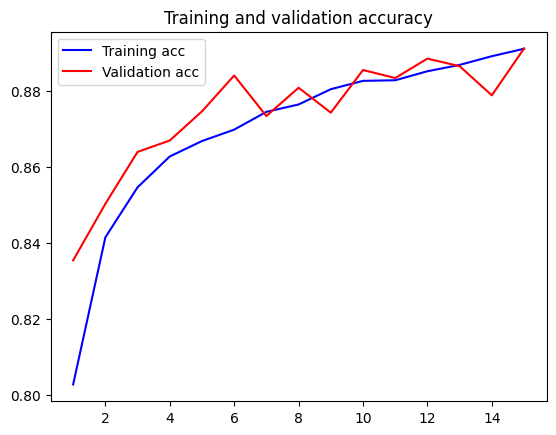

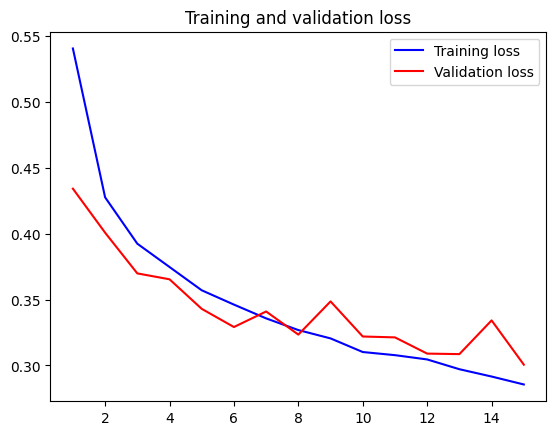

In [46]:
# Exp 5

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [47]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.3279 - accuracy: 0.8838


[0.32793954014778137, 0.8838000297546387]

# Final report
The iterative process of model tuning has led to a robust neural network model that balances the trade-offs between bias and variance effectively. The application of dropout regularization was pivotal in reducing overfitting, while strategic adjustments to the model's architecture improved its learning capacity. The final model is performing well, with an accuracy that satisfies the criteria set forth for this specific application. This journey underscores the importance of a methodical approach to model building, where each change is carefully evaluated based on its impact on the model's performance and generalization capabilities.
...